#Notebook refers to the Practical Work at Module 4 (Learning methodologies) IGTI Bootcamp Machine Learning.

The purpose of this exercise is to classify images using a neural network. This will be train a neural network model for classifying clothing images, using  TensorFlow.

Keras will be used to build and train Fashion Mnist'model in Tensorflow once Mnist is one of the dataset perfect to verify if a algorithm is good enough to train e testing a Model.



In [48]:
# importing the libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [49]:
#download the dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [50]:
#describing the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot']

The first portion of 60000 images will be used for trainig and the other portion of 10000 images will be used for testing if the Model is performing well the image classification.

In [51]:
print(train_images.shape)
print(test_images.shape)
train_labels

(60000, 28, 28)
(10000, 28, 28)


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Plotting one of the images

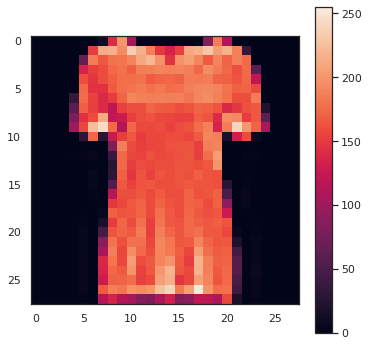

In [52]:
plt.figure(figsize= (6,6))
plt.imshow(train_images[10])
sns.set_theme(style = "white")
plt.colorbar()
plt.grid(False)
cmap=matplotlib.colors.Colormap("hot")
plt.show()

The images are in the Numpy's arrays format with 28 X 28 pixels gray scale from o to 255. So let's defining a function to scale the images.

In [53]:
train_images = train_images / 255.0
test_images  = test_images / 255.0

Plotting several images using matplotlib in order to check if the format is correct to train the Model

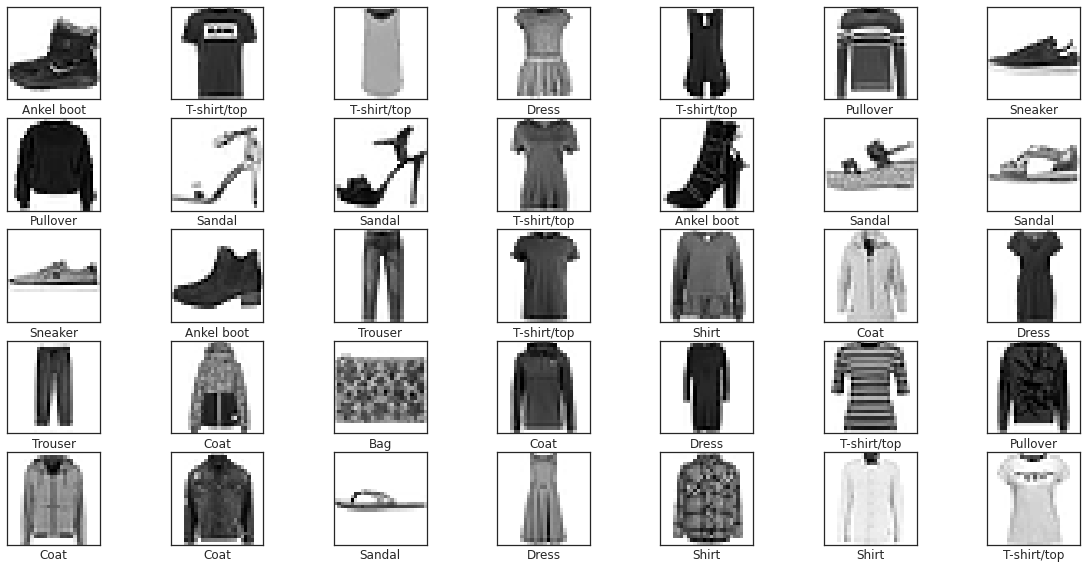

In [54]:
plt.figure(figsize = (20,14))
sns.set_theme(style = 'white')
for i in range(35):
  plt.subplot(7,7,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

As informed above the main objective of this exercise is to classify images using a neural network. 

Let's to do this using Keras for setting layers to have a representation of the data.

In [55]:
#building the chaining of the layers using one Dense layer with 128 nodes (neurons) and another one with 10 nodes
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),  # 28 X 28 pixels at vector of 784 positions
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation= 'softmax')
])

In [56]:
# printing a description of the architecture of neural network
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [57]:
#after setting up the Model, now it is necessary compile it through out some adjustments 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  # the accuracy will be show us the percentual of images were correctly classified
              

In [77]:
#let's oberve the historcial accuracy of the algorithm with ten epochs (the number of complete passes through the training dataset)
history = model.fit(train_images, train_labels, epochs = 10, batch_size = 128,  #(the number of samples processed before the Model is updated)
validation_data = (test_images, test_labels))


Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2055 - accuracy: 0.9237 - val_loss: 0.1410 - val_accuracy: 0.9487
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1862 - accuracy: 0.9302 - val_loss: 0.1494 - val_accuracy: 0.9434
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1753 - accuracy: 0.9354 - val_loss: 0.1579 - val_accuracy: 0.9416
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1687 - accuracy: 0.9365 - val_loss: 0.1688 - val_accuracy: 0.9374
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1645 - accuracy: 0.9384 - val_loss: 0.1727 - val_accuracy: 0.9357
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1604 - accuracy: 0.9405 - val_loss: 0.1839 - val_accuracy: 0.9323
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1563 - accuracy: 0.9427 - val_loss: 0.1963 - val_accuracy: 0.9241
Epoch 

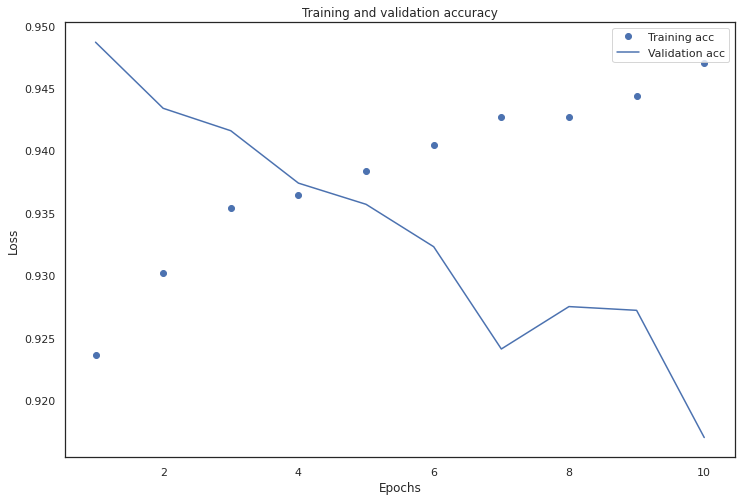

In [78]:
#plotting a graph of training and validation accuracy
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12, 8))
sns.set_theme(style = 'white')
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

To evaluate the Model, we will apply the method model.evaluate at the test portion.

In [79]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

print('\nAccuracy Test: {0:.2f}%'.format(test_acc*100))

313/313 - 0s - loss: 0.2136 - accuracy: 0.9170

Accuracy Test: 91.70%


With the Model trained, it can do the classification on new images using the *'model.predict'* method to predict the label of each image in the test set

In [62]:
predictions = model.predict(test_images)

In [63]:
# once the Model predicted the label of image, we can take a look at the third prediction for example.
predictions [2]

array([7.8118694e-09, 1.0000000e+00, 3.4278435e-12, 5.5225549e-09,
       1.3827892e-11, 8.3300198e-22, 8.8443877e-11, 1.2127760e-25,
       4.6211121e-16, 3.4335950e-16], dtype=float32)

The prediction is an array of 10 numbers. They represent a confidence of the Model that the image corresponds to each of the different articles of clothing. 

In [64]:
#to view the label that has the highest probability in the prediction values, let's use the argmax method of the Numpy package.
np.argmax(predictions[2])

1

In [65]:
test_labels[2]

1

In [66]:
#We can show graphically what it looks like in a total forecast set of 10 classes.
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

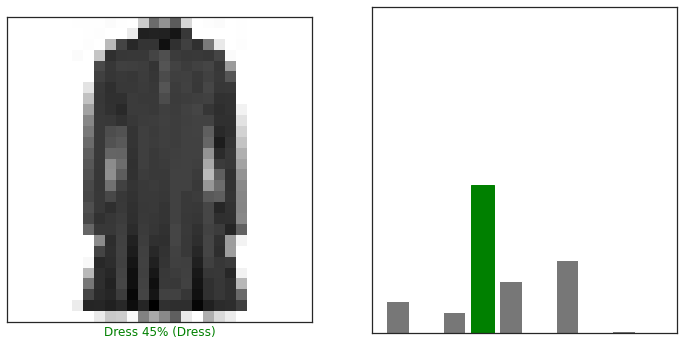

In [67]:
i = 29
plt.figure(figsize=(12,6))
sns.set_theme(style = 'white')
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

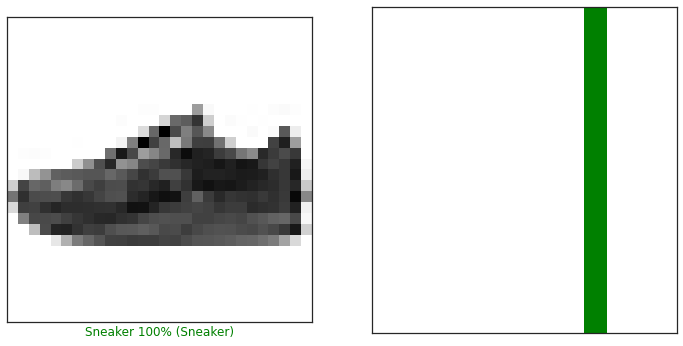

In [68]:
i = 104
plt.figure(figsize=(12,6))
sns.set_theme(style = 'white')
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Let's plot some predictions of the model. Correctly predicted labels are green and the wrong predictions are red. The number gives the percentage (of 100) of the predicted labels.

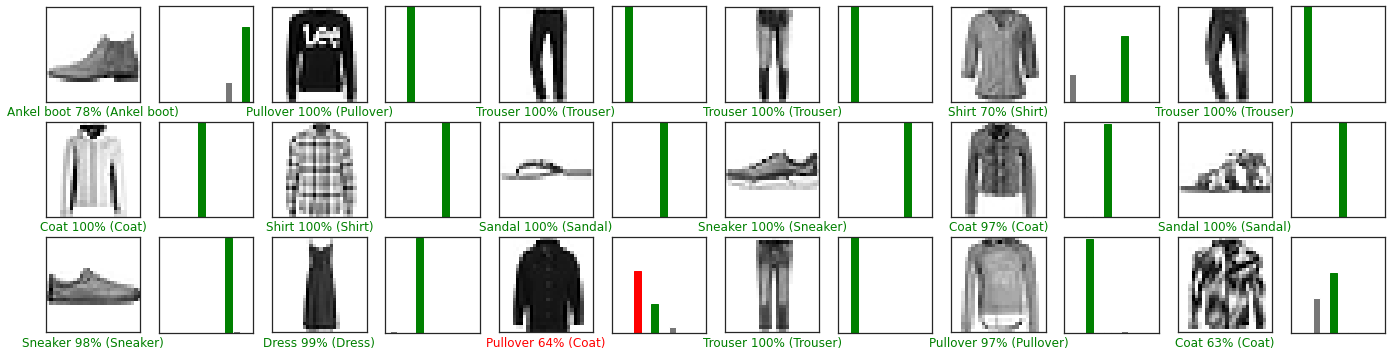

In [69]:
num_rows = 3
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
sns.set_theme(style =  'white')
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Using the trained Model to predict just one single image.

It is necessary to say that in order to get the prediction for our single image, we need to indicate the index 0, since the python arrays start from zero.

In [70]:
# grabbing an image from the test portion
single_image = test_images[0] 
print(single_image.shape)

(28, 28)


Tf.keras models are optimized to make predictions in a data table or batch in one go. Since we are using a single image, we need to add it to a list using the *expand_dims* method of the numpy package.

In [71]:
single_image = (np.expand_dims(single_image, 0))

print(single_image.shape)

(1, 28, 28)


In [72]:
#let's predict the label for this single image
predictions_label = model.predict(single_image)

print(predictions_label)

[[8.6640705e-07 7.3942026e-11 1.3253568e-10 1.3744326e-11 2.1484750e-09
  5.7975431e-03 6.0476109e-06 2.1330029e-01 1.6540558e-05 7.8087866e-01]]


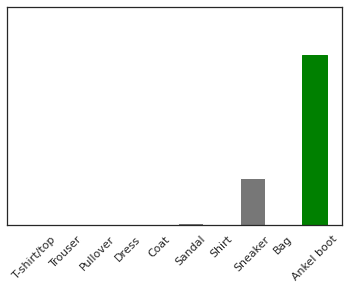

In [74]:
plot_value_array(0, predictions_label, test_labels)
sns.set_theme(style='white')
_= plt.xticks(range(10), class_names, rotation = 45)

In [76]:
#finally, let's take the prediction of the one single image
np.argmax(predictions_label[0])

9

In conclusion, the Model was built and trained, and we could see step by step how Keras classifying a clothing dataset with tensorflow API. For that, we used a tutorial mentioned on the TensorFlow website.

https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br.